# Assignment on Visualizing Distributions

## Moscow Housing Price Dataset

### ``Exploring housing markets: predicting property Prices in Moscow and Moscow Oblast``

### This dataset comprises information essential for predicting housing prices in Moscow and the Moscow Oblast region. Collected in November 2023, the data is current and pertinent for analysis. It includes various attributes crucial for predicting housing costs, such as location, size, amenities, and other relevant factors influencing property prices.


### 1. Data Exploration: ``Import necessary libraries (Pandas, Matplotlib, Seaborn).``

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Exploring the dataset

In [2]:
# Load the dataset
housing = pd.read_csv('data.csv')

# Display the first few rows
housing.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


### 3. Scatter plot to explore the distribution of Apartment price per Number of rooms

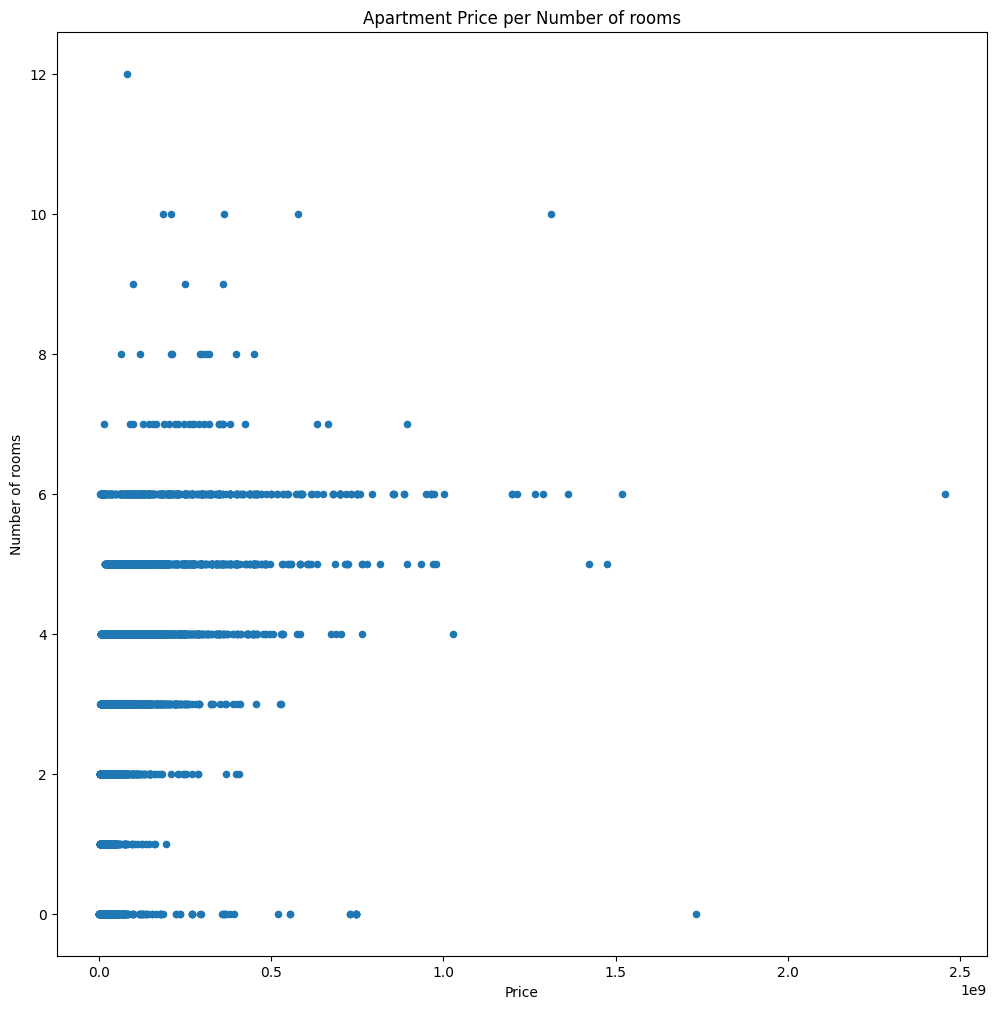

In [3]:
housing.plot(kind='scatter', x='Price', y='Number of rooms', figsize=(12,12))

plt.title('Apartment Price per Number of rooms')
plt.ylabel('Number of rooms')
plt.xlabel('Price')

plt.show()

### 3. Histogram to explore the distribution of apartment prices.

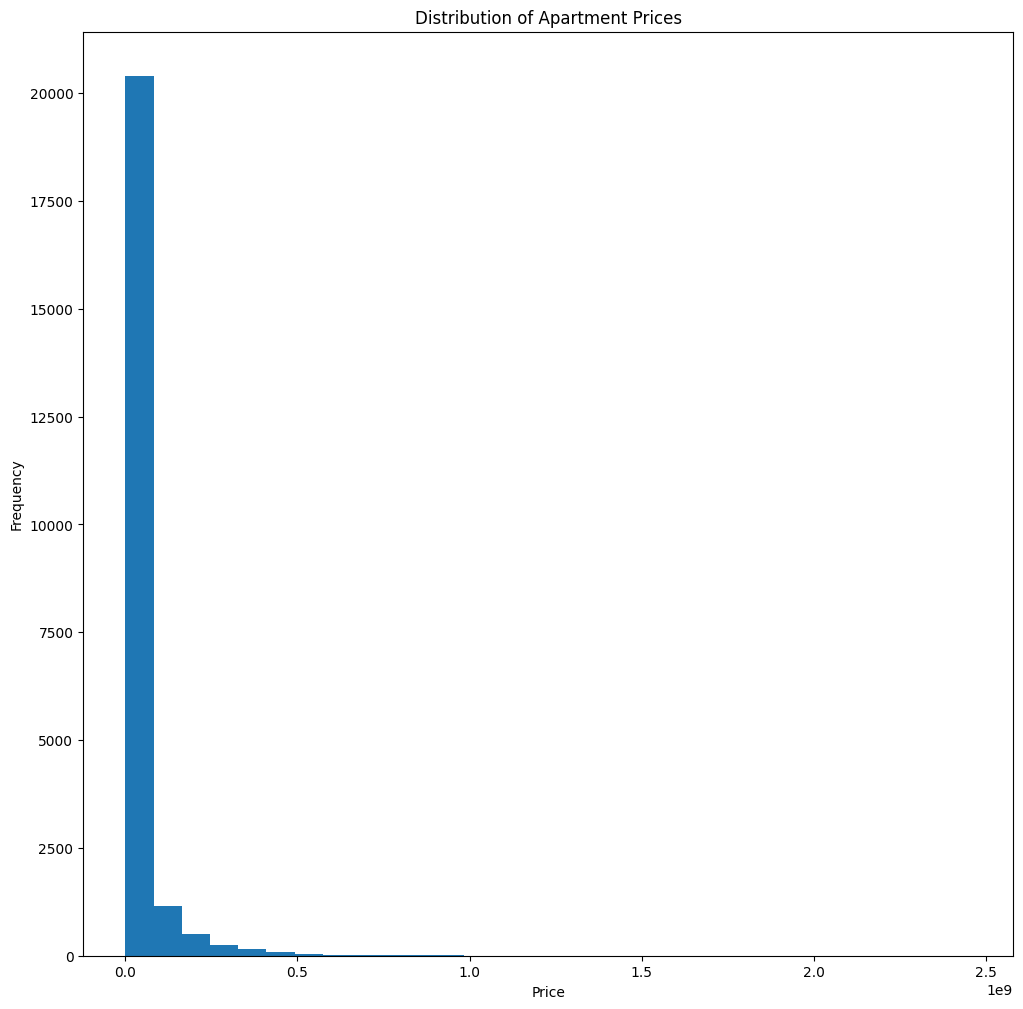

In [4]:
housing['Price'].plot(kind = 'hist', bins=30, figsize=(12, 12))
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### 4. Filter data to get apartments with price under 20,000,000

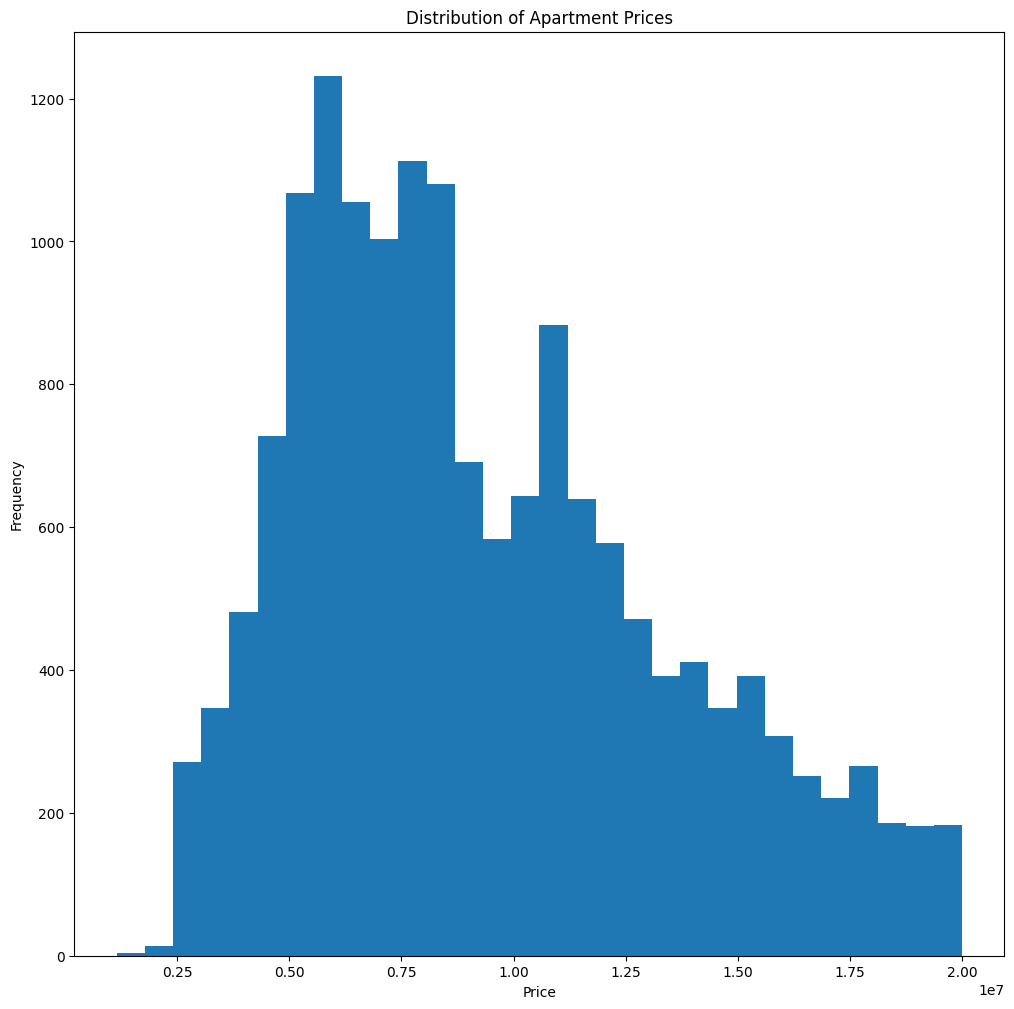

In [5]:
f_housing = housing[(housing['Price'] > 1) & (housing['Price'] < 20000000)]
f_housing['Price'].plot(kind = 'hist', bins=30, figsize=(12, 12))
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### 5. 2D histogram to compare the relationship between Price vs. Number of rooms

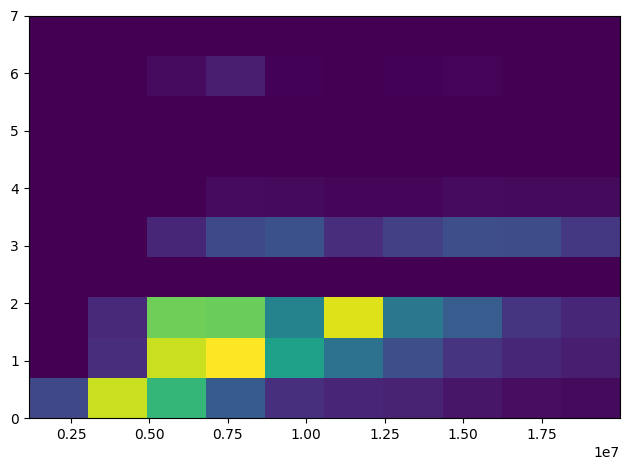

In [6]:
x = f_housing['Price']
y = f_housing['Number of rooms']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

### 6. Histogram to explore the distribution in terms of "Renovation Style"

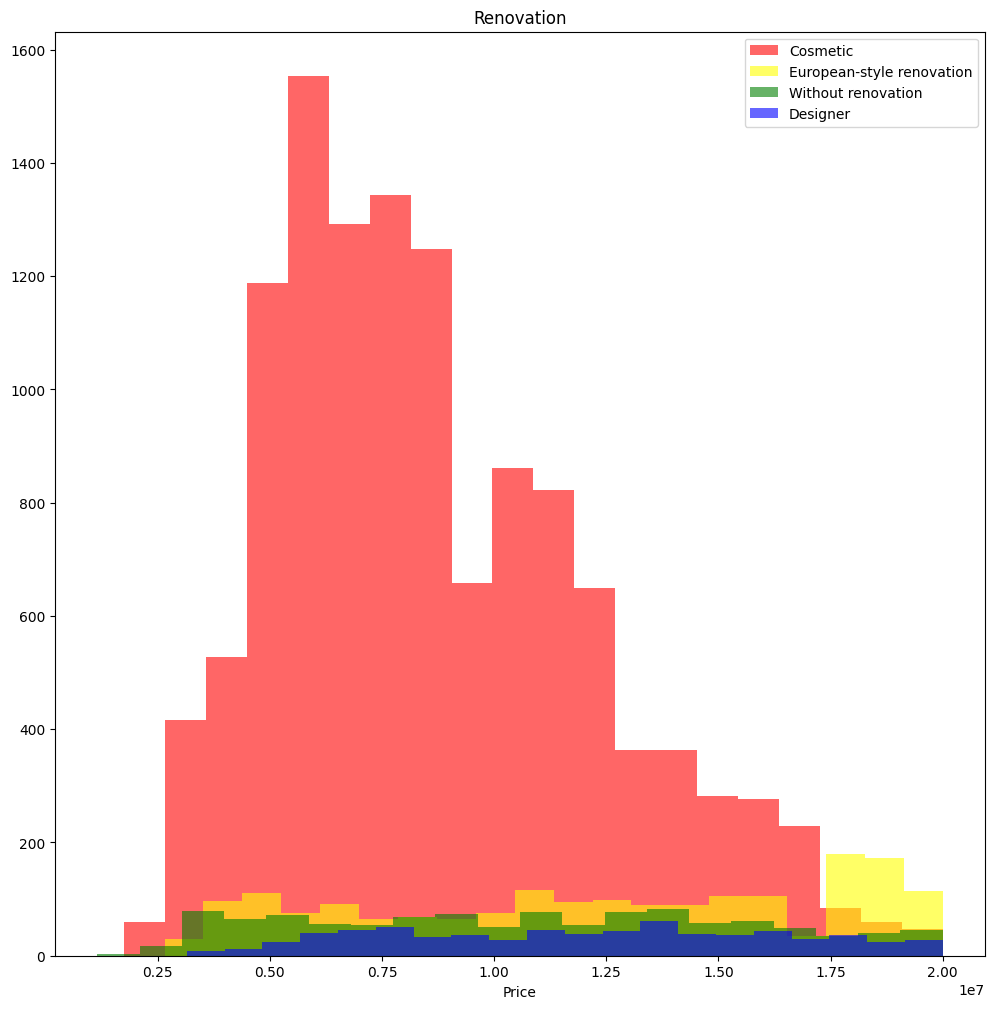

In [7]:
plt.figure(figsize=(12, 12))
x1 = f_housing.loc[f_housing.Renovation=='Cosmetic', 'Price']
x2 = f_housing.loc[f_housing.Renovation=='European-style renovation', 'Price']
x3 = f_housing.loc[f_housing.Renovation=='Without renovation', 'Price']
x4 = f_housing.loc[f_housing.Renovation=='Designer', 'Price']

kwargs = dict(alpha=0.6, bins=20)

plt.hist(x1, **kwargs, color='red', label='Cosmetic')
plt.hist(x2, **kwargs, color='yellow', label='European-style renovation')
plt.hist(x3, **kwargs, color='green', label='Without renovation')
plt.hist(x4, **kwargs, color='blue', label='Designer')


plt.gca().set(title='Renovation', xlabel='Price')
plt.legend();

### 7. barplot to explore average price base on the Renovation style

/tmp/ipykernel_9889/3346053292.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Renovation', y='Price', data=renovation_grouped, palette='viridis')


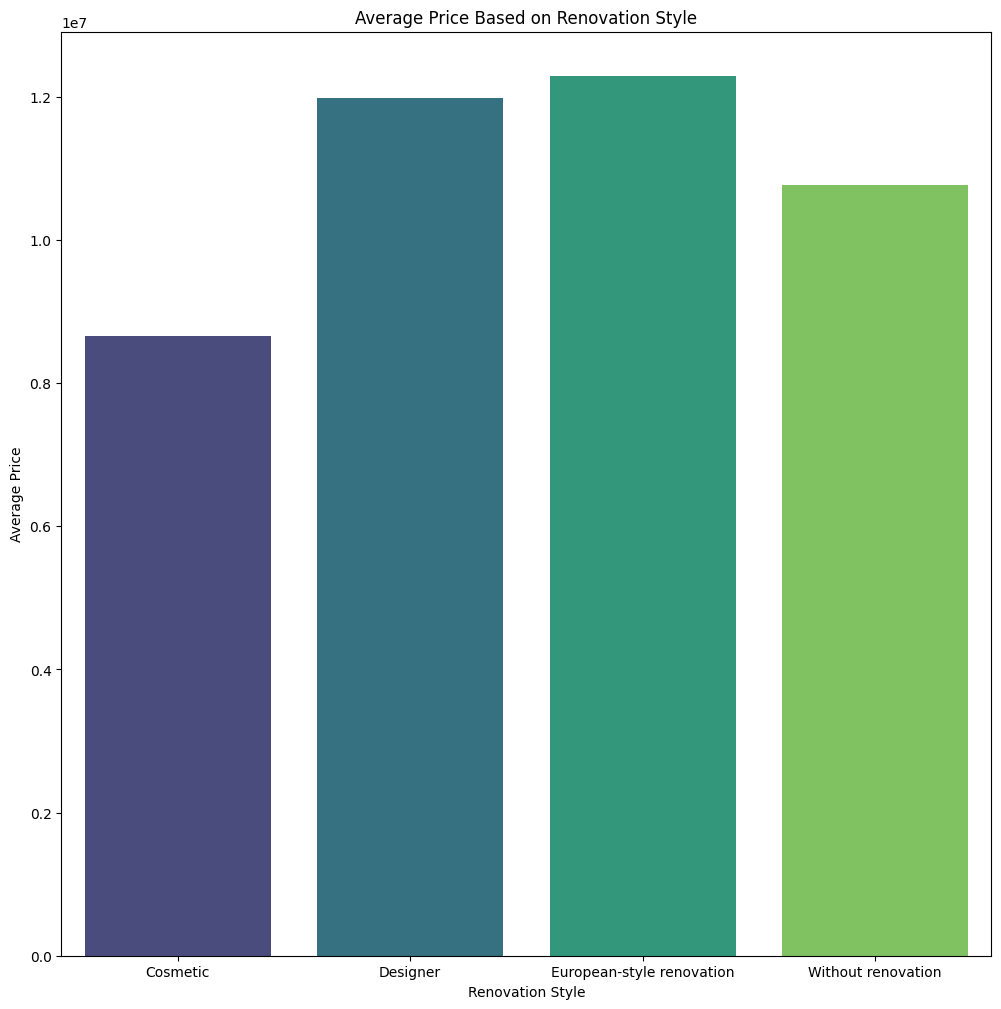

In [8]:
# Group housing by "Renovation" and estimate the average apartment price
renovation_grouped = f_housing.groupby('Renovation')['Price'].mean().reset_index()

# Create a bar plot with different colors for each renovation style
plt.figure(figsize=(12, 12))
sns.barplot(x='Renovation', y='Price', data=renovation_grouped, palette='viridis')

plt.title('Average Price Based on Renovation Style')
plt.xlabel('Renovation Style')
plt.ylabel('Average Price')
plt.show()

### 8.  Boxplot for region vs. price

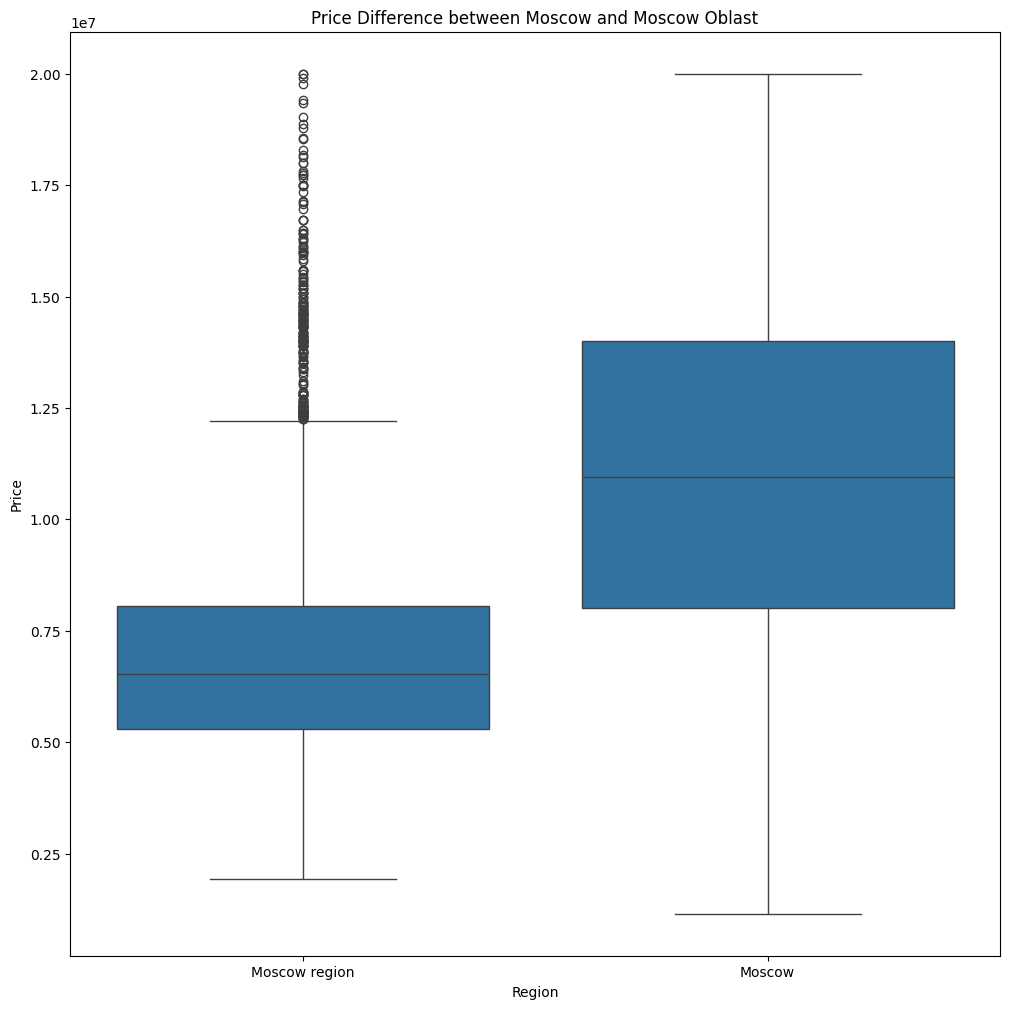

In [9]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='Region', y='Price', data=f_housing)
plt.title('Price Difference between Moscow and Moscow Oblast')
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

### 9. Density plot: a smoother density chart of the distribution of Apartment prices

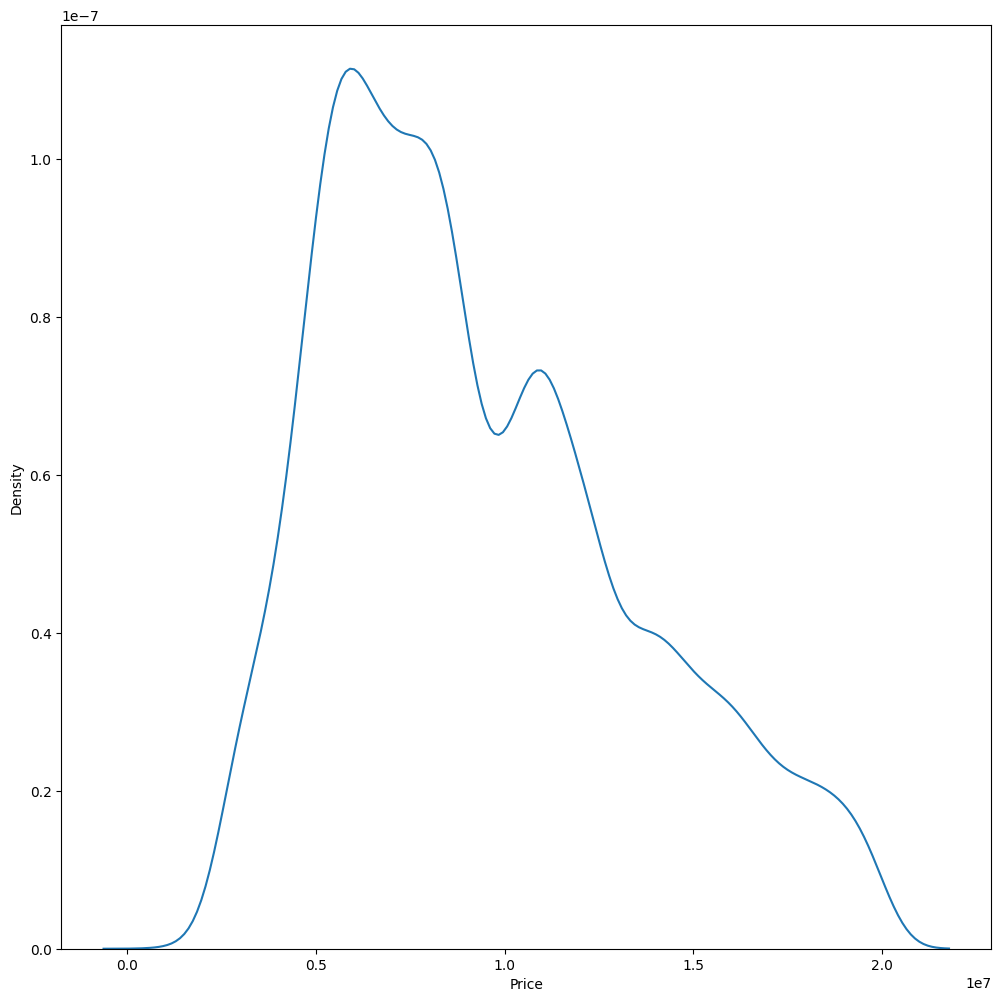

In [10]:
plt.figure(figsize=(12, 12))
sns.kdeplot(f_housing['Price'])
plt.show()

### 10. Density plot showing the Apartment price density per region

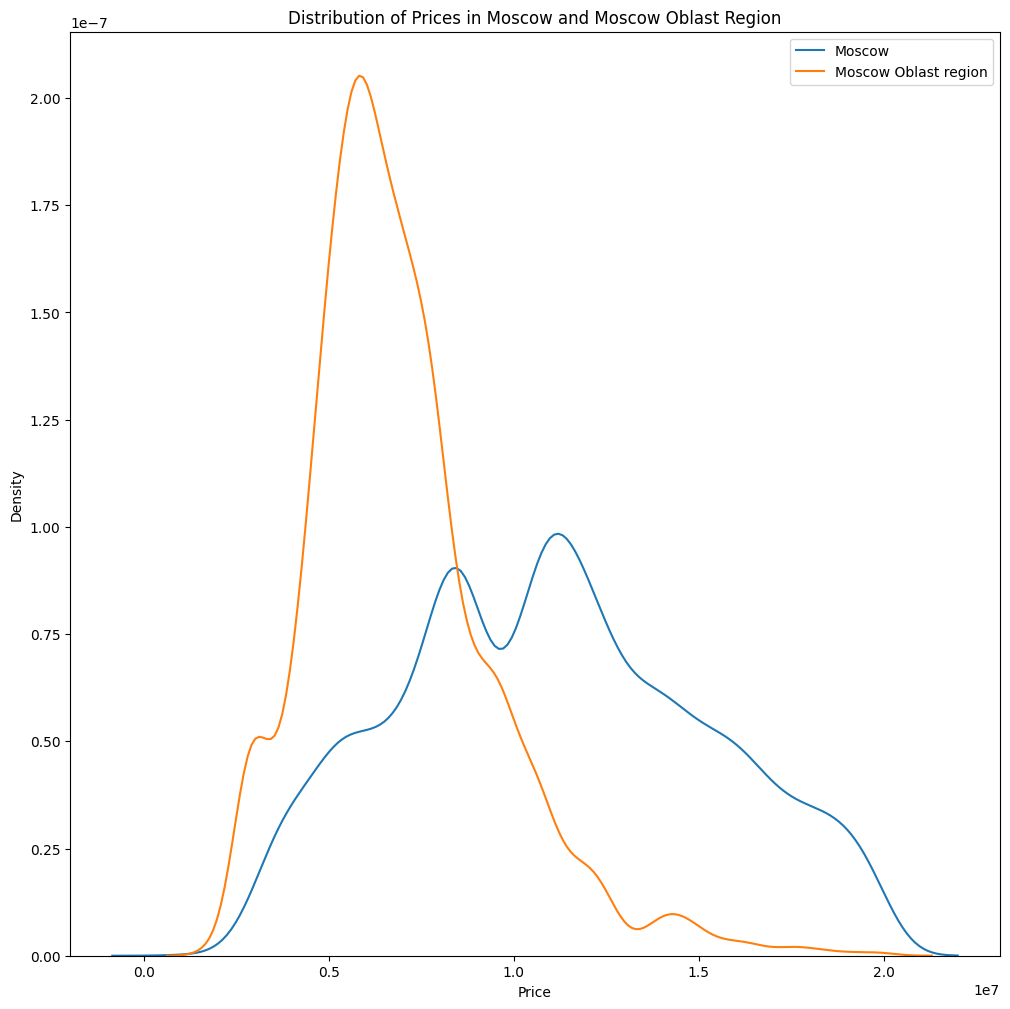

In [20]:
# Filter data for Moscow and Moscow region
f_moscow = f_housing[f_housing['Region'] == 'Moscow']
f_moscow_o = f_housing[f_housing['Region'] == 'Moscow region']

# Create KDE plots with labels
plt.figure(figsize=(12, 12))
sns.kdeplot(f_moscow['Price'], label='Moscow')
sns.kdeplot(f_moscow_o['Price'], label='Moscow Oblast region')

plt.legend()

plt.title('Distribution of Prices in Moscow and Moscow Oblast Region')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

### 11. Density plot showing the Apartment price density per Apartment type

<Axes: xlabel='Price', ylabel='Density'>

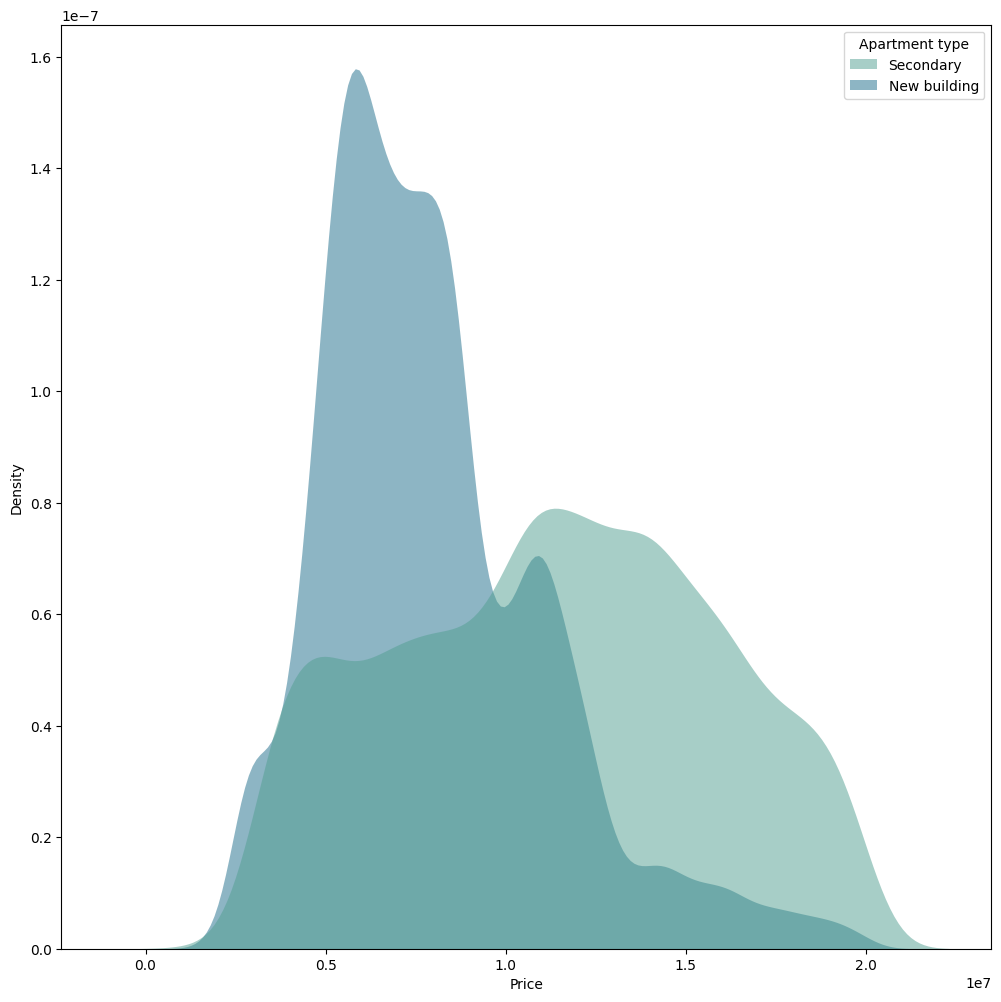

In [11]:
plt.figure(figsize=(12, 12))
sns.kdeplot(
   data=f_housing, x="Price", hue="Apartment type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

### 12. Density plot showing the Apartment price density per Renovation style

<Axes: xlabel='Price', ylabel='Density'>

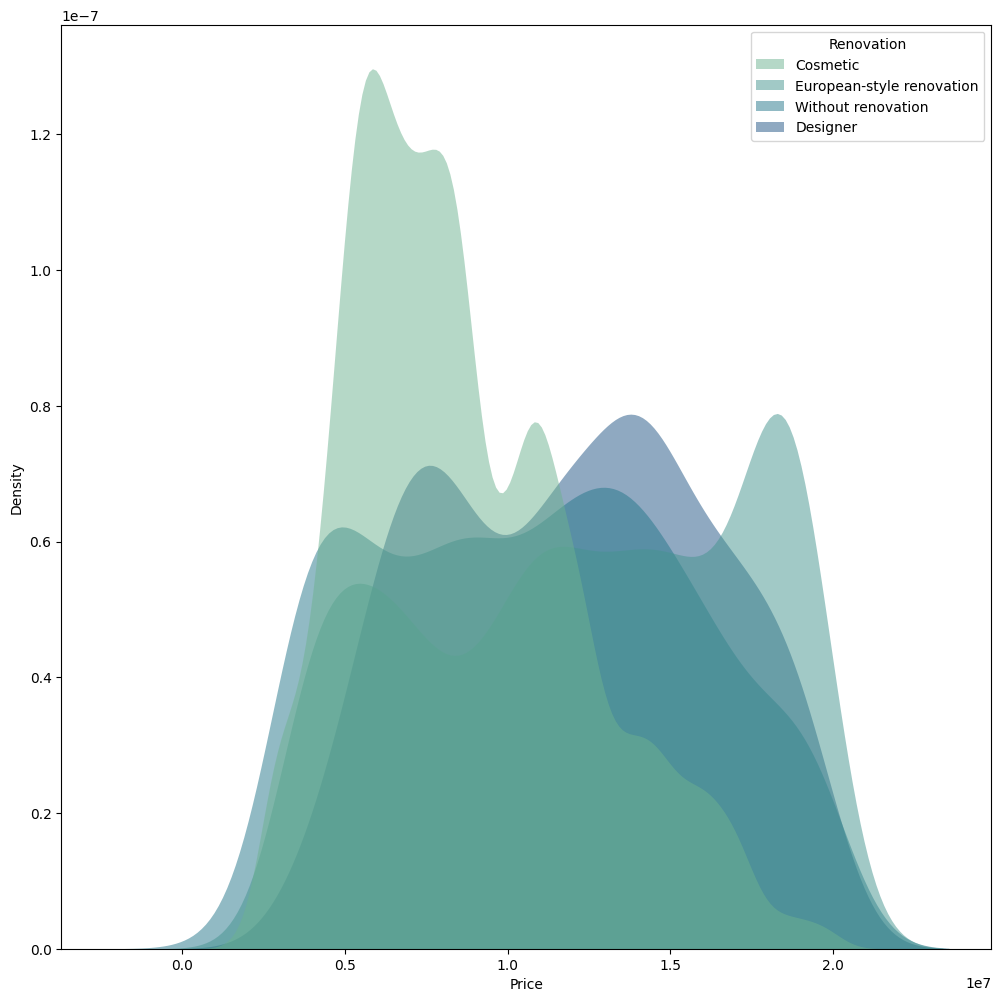

In [12]:
plt.figure(figsize=(12, 12))
sns.kdeplot(
   data=f_housing, x="Price", hue="Renovation",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

### 13. Map density showing the Apartment price, number of rooms compared to Renovation style

<Axes: xlabel='Price', ylabel='Number of rooms'>

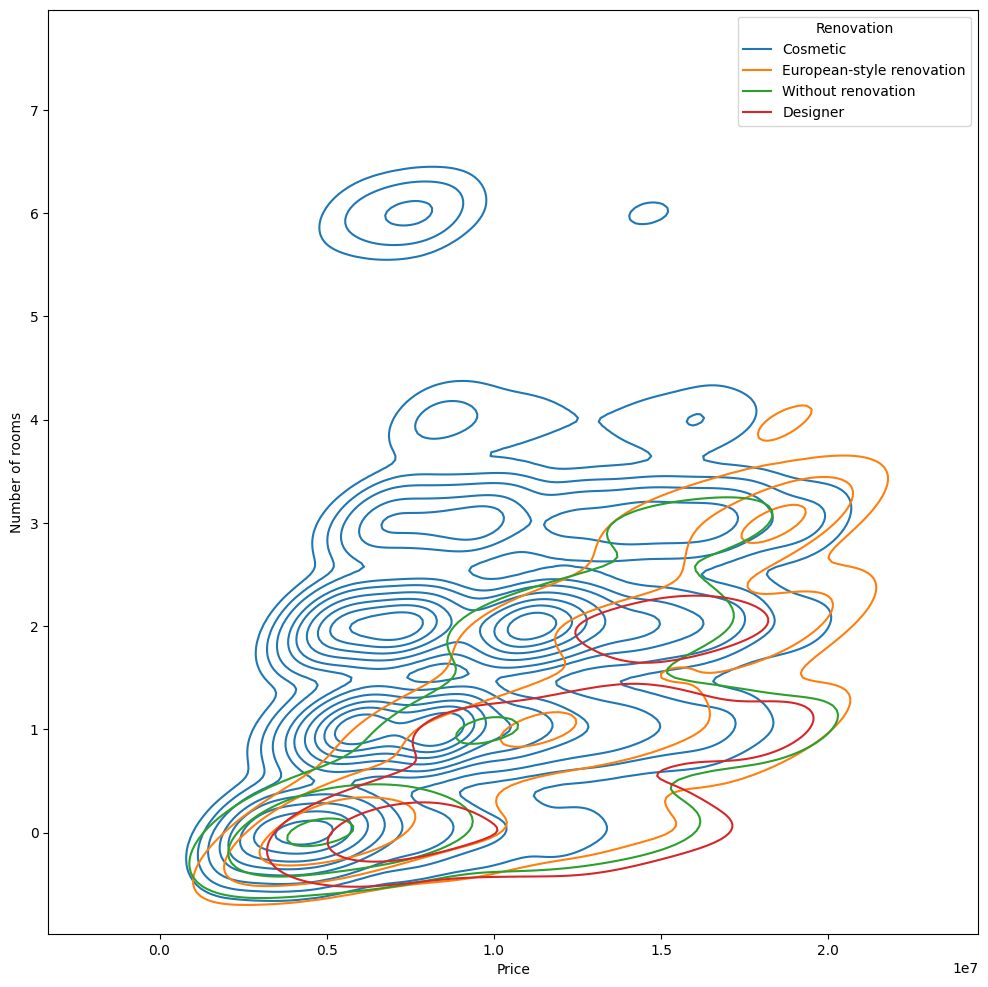

In [13]:
plt.figure(figsize=(12, 12))
sns.kdeplot(data=f_housing, x="Price", y="Number of rooms", hue="Renovation")